# Data Streaming Invasive Alien Species Digital Twin Outputs

**Author**: [Taimur Khan](https://www.ufz.de/index.php?en=49404), Helmholtz Centre for Environmental Research - UFZ, Germany

**Date**: 2025-02-20

## Purpose

The purpose of this notebook is to demonstrate how to stream the outputs of the Invasive Alien Species Digital Twin from the [BioDT OPenDAP service](http://opendap.biodt.eu). The outputs are streamed in real-time using `rioxarray` and visualized using the `matplotlib` library.

The notebook has been parameterized using Jupyter Widgets to allow the user to select the desired habitat, climate model, climate scenario, and time period parameters for querying the desired dataset. 

The notebook is divided into the following sections:
- [1. Import Libraries](#1.-Import-Libraries)
- [2. Define Parameters](#2.-Define-Parameters)
- [3. Query URL](#3.-Query-Data)
- [4. Stream Data](#4.-Stream-Data)
- [5. Visualize Data](#5.-Visualize-Data)
- [6. Download Data (optional)](#6.-Download)

## 1. Import Libraries

If you do not have the required libraries installed, you can install them by running the following cell:

In [1]:
!pip install rioxarray matplotlib pandas matplotlib_scalebar ipywidgets

Otherwise just import the following:

In [2]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import rioxarray
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.patches as mpatches
import matplotlib.animation as animation
import os

import os
import requests
import rasterio
from rasterio.merge import merge


In [3]:
# A-Selecte Habitat
url = "http://opendap.biodt.eu/ias-pdt/0/outputs/key.csv"
df_hab = pd.read_csv(url)

# Get the corresponding value for hab_abb for the selected hab_name
selected_hab_abb = '1'
conf_data_path = '/tmp/data/'



folder_path = None
tif_url = None
download_path = None


param_habitat_name =  'Ruderal habitats'
habitat_type = param_habitat_name.replace(' ','_').lower()
selected_hab_abb = str(df_hab[df_hab["hab_name"] == habitat_type]["hab_abb"].values[0])
param_climate_model = 'IPSL-CM6A-LR'
param_species_class = 'Liliopsida'


conf_x =  0.95
conf_y =  0.95
conf_arrow_length = 0.1
print(f"Selected Habitat Abbreviation: {selected_hab_abb}")

Selected Habitat Abbreviation: 12a


## 3. Query URL

In [4]:
# B-Query URL
url_txt = f"http://opendap.biodt.eu/ias-pdt/0/outputs/hab{selected_hab_abb}/predictions/Prediction_Summary_Shiny.txt"
df_mod = pd.read_csv(url_txt, sep="\t")
display(df_mod)
habitat_number = str(df_mod[df_mod["hab_name"] == param_habitat_name]["hab_abb"].values[0] )


,hab_abb,hab_name,time_period,climate_model,climate_scenario,ias_id,taxon_name,species_name,class,order,family,tif_path_mean,tif_path_sd,tif_path_cov,tif_path_anomaly
0,12a,Ruderal habitats,1981-2010,Current,Current,SR,NaN,NaN,NaN,NaN,NaN,Current/SR_mean.tif,Current/SR_sd.tif,Current/SR_cov.tif,NaN
1,12a,Ruderal habitats,1981-2010,Current,Current,Sp_0001,Acorus calamus L.,Acorus calamus,Liliopsida,Acorales,Acoraceae,Current/Sp_0001_mean.tif,Current/Sp_0001_sd.tif,Current/Sp_0001_cov.tif,NaN
2,12a,Ruderal habitats,1981-2010,Current,Current,Sp_0007,Lysichiton americanus Hultén & H.St.John,Lysichiton americanus,Liliopsida,Alismatales,Araceae,Current/Sp_0007_mean.tif,Current/Sp_0007_sd.tif,Current/Sp_0007_cov.tif,NaN
3,12a,Ruderal habitats,1981-2010,Current,Current,Sp_0011,Zantedeschia aethiopica (L.) Spreng.,Zantedeschia aethiopica,Liliopsida,Alismatales,Araceae,Current/Sp_0011_mean.tif,Current/Sp_0011_sd.tif,Current/Sp_0011_cov.tif,NaN
4,12a,Ruderal habitats,1981-2010,Current,Current,Sp_0012,Phoenix dactylifera L.,Phoenix dactylifera,Liliopsida,Arecales,Arecaceae,Current/Sp_0012_mean.tif,Current/Sp_0012_sd.tif,Current/Sp_0012_cov.tif,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20281,12a,Ruderal habitats,2071-2100,UKESM1-0-LL,ssp585,Sp_1320,Tsuga canadensis (L.) Carrière,Tsuga canadensis,Pinopsida,Pinales,Pinaceae,2071_2100_ssp585_UKESM1_0_LL/Sp_1320_mean.tif,2071_2100_ssp585_UKESM1_0_LL/Sp_1320_sd.tif,2071_2100_ssp585_UKESM1_0_LL/Sp_1320_cov.tif,2071_2100_ssp585_UKESM1_0_LL/Sp_1320_anomaly.tif
20282,12a,Ruderal habitats,2071-2100,UKESM1-0-LL,ssp585,Sp_1321,Tsuga heterophylla (Raf.) Sarg.,Tsuga heterophylla,Pinopsida,Pinales,Pinaceae,2071_2100_ssp585_UKESM1_0_LL/Sp_1321_mean.tif,2071_2100_ssp585_UKESM1_0_LL/Sp_1321_sd.tif,2071_2100_ssp585_UKESM1_0_LL/Sp_1321_cov.tif,2071_2100_ssp585_UKESM1_0_LL/Sp_1321_anomaly.tif
20283,12a,Ruderal habitats,2071-2100,UKESM1-0-LL,ssp585,Sp_1328,Cyrtomium falcatum (L.fil.) C.Presl,Cyrtomium falcatum,Polypodiopsida,Polypodiales,Dryopteridaceae,2071_2100_ssp585_UKESM1_0_LL/Sp_1328_mean.tif,2071_2100_ssp585_UKESM1_0_LL/Sp_1328_sd.tif,2071_2100_ssp585_UKESM1_0_LL/Sp_1328_cov.tif,2071_2100_ssp585_UKESM1_0_LL/Sp_1328_anomaly.tif
20284,12a,Ruderal habitats,2071-2100,UKESM1-0-LL,ssp585,Sp_1329,Cyrtomium fortunei J.Sm.,Cyrtomium fortunei,Polypodiopsida,Polypodiales,Dryopteridaceae,2071_2100_ssp585_UKESM1_0_LL/Sp_1329_mean.tif,2071_2100_ssp585_UKESM1_0_LL/Sp_1329_sd.tif,2071_2100_ssp585_UKESM1_0_LL/Sp_1329_cov.tif,2071_2100_ssp585_UKESM1_0_LL/Sp_1329_anomaly.tif


In [5]:
# C1-paths-mean-query
import shutil


df_mod = pd.read_csv(url_txt, sep="\t")

filtered_df = df_mod[
    (df_mod["hab_abb"] == habitat_number) &
    (df_mod["climate_model"] == param_climate_model) &
    (df_mod["class"] == param_species_class) 
]


# display(filtered_df)

grouped_tif_paths = filtered_df.groupby("time_period")["tif_path_mean"].agg(list).to_dict()

# print(grouped_tif_paths)


base_dir = conf_data_path+"output_tif_groups"
shutil.rmtree(base_dir,ignore_errors=True)
# Ensure base directory exists
os.makedirs(base_dir, exist_ok=True)

# Save each year's tif_path_mean array as a text file
year_paths = []
for year, paths in grouped_tif_paths.items():
    year_dir = os.path.join(base_dir, str(year))  # Create a folder for each year
    os.makedirs(year_dir, exist_ok=True)  # Ensure folder exists
    year_paths.append(year_dir)
    file_path = os.path.join(year_dir, f"{year}_tif_paths.txt")  # File name
    with open(file_path, "w") as f:
        for path in paths:
            f.write(path + "\n")  # Write each path on a new line

    print(f"Saved {len(paths)} paths for {year} in {file_path}")



Saved 216 paths for 2011-2040 in /tmp/data/output_tif_groups/2011-2040/2011-2040_tif_paths.txt
Saved 216 paths for 2041-2070 in /tmp/data/output_tif_groups/2041-2070/2041-2070_tif_paths.txt
Saved 216 paths for 2071-2100 in /tmp/data/output_tif_groups/2071-2100/2071-2100_tif_paths.txt


In [6]:
# D Merge_tif_files

import os
import rasterio
from rasterio.merge import merge

def download_file_from_url(tif_url, download_path):
    """Function to download a file if it's a URL"""
    if tif_url.startswith("http"):
        response = requests.get(tif_url, stream=True)
        if response.status_code == 200:
            with open(download_path, "wb") as out_file:
                out_file.write(response.content)
        else:
            print(f"Failed to download: {tif_url}")
            return None
    else:
        return tif_url
    return download_path


def merge_tif_files(folder_path, output_filename):
    """
    Merges all GeoTIFF files in the given folder and saves the merged result.
    
    Parameters:
    - folder_path: str, path to the folder containing GeoTIFF files
    - output_filename: str, name of the output merged GeoTIFF file
    """
    # List all files in the folder
    tif_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.tif')]
    
    if not tif_files:
        return None
    
    # Open all GeoTIFF files
    src_files_to_mosaic = [rasterio.open(fp) for fp in tif_files]

    # Merge the files
    mosaic, out_transform = merge(src_files_to_mosaic)

    # Write the merged file
    merged_tif_path = os.path.join(folder_path, output_filename)
    with rasterio.open(
        merged_tif_path, "w",
        driver="GTiff",
        height=mosaic.shape[1],
        width=mosaic.shape[2],
        count=src_files_to_mosaic[0].count,
        dtype=src_files_to_mosaic[0].dtypes[0],
        crs=src_files_to_mosaic[0].crs,
        transform=out_transform
    ) as dest:
        dest.write(mosaic)
    
    # Close the files
    for src in src_files_to_mosaic:
        src.close()
    return merged_tif_path

merged_tifs = []
for year_path in year_paths:
    files_in_year_folder = [file for file in os.listdir(year_path) if file.endswith('.txt')]
    for txt_file in files_in_year_folder:
        txt_path = os.path.join(year_path, txt_file)
        print(txt_path)
        with open(txt_path, "r") as f:
            tif_paths = [line.strip() for line in f.readlines()]
        for tif_path_mean in tif_paths:
            mean_url = f"http://opendap.biodt.eu/ias-pdt/0/outputs/hab{habitat_number}/predictions/{tif_path_mean}"
            tif_filename = os.path.join(year_path, os.path.basename(mean_url))
            downloaded_file = download_file_from_url(mean_url, tif_filename)
        year = os.path.basename(year_path)
        merged_output_filename = f"{year}_merged_output.tif"
        merged_tif = merge_tif_files(year_path, merged_output_filename)
        merged_tifs.append(merged_tif)
            
        

/tmp/data/output_tif_groups/2011-2040/2011-2040_tif_paths.txt
/tmp/data/output_tif_groups/2041-2070/2041-2070_tif_paths.txt
/tmp/data/output_tif_groups/2071-2100/2071-2100_tif_paths.txt


## 5. Visualize Data

['/tmp/data/output_tif_groups/2011-2040/2011-2040_merged_output.tif', '/tmp/data/output_tif_groups/2041-2070/2041-2070_merged_output.tif', '/tmp/data/output_tif_groups/2071-2100/2071-2100_merged_output.tif']
/tmp/data/output_tif_groups/2011-2040/2011-2040_merged_output.tif
/tmp/data/output_tif_groups/2041-2070/2041-2070_merged_output.tif
/tmp/data/output_tif_groups/2071-2100/2071-2100_merged_output.tif
Animation saved as /tmp/data/2071-2100_merged_output.tif


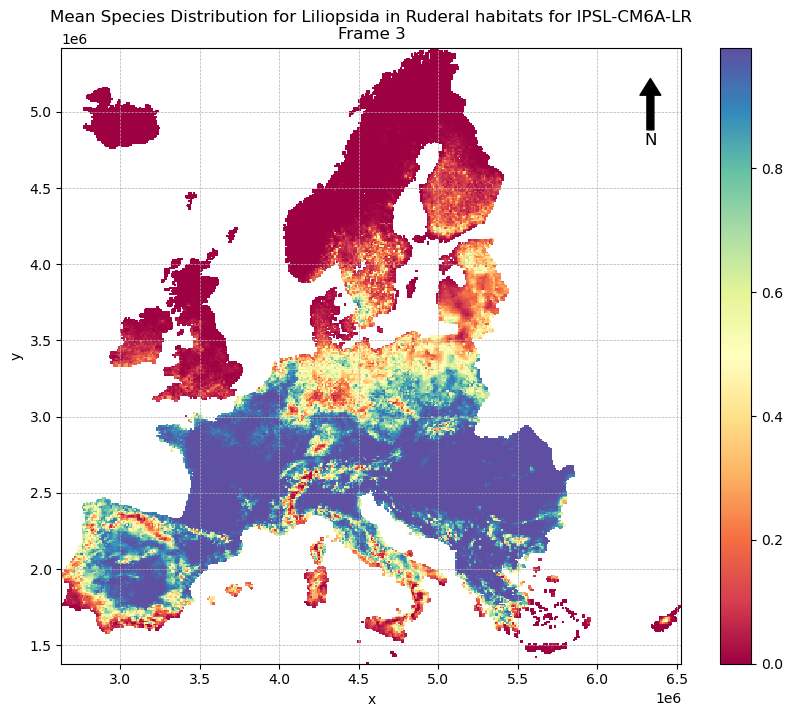

In [7]:
# E-Plot Mean
print(merged_tifs)
frames = []


for tif_file in merged_tifs:
    print(tif_file)
    data_mean = rioxarray.open_rasterio(tif_file)
    frames.append(data_mean[0])    



fig, ax = plt.subplots(figsize=(10, 8))
img = frames[0].plot(ax=ax, cmap="Spectral", add_colorbar=True)
ax.grid(True, linestyle="--", linewidth=0.5)

# Add north arrow
ax.annotate( "N",
    xy=(conf_x, conf_y),
    xytext=(conf_x, conf_y - conf_arrow_length),
    arrowprops=dict(facecolor="black", width=5, headwidth=15),
    ha="center",
    va="center",
    fontsize=12,
    xycoords=ax.transAxes,
)

# Update function for animation
def update(frame_idx):
    img.set_array(frames[frame_idx].values)
    ax.set_title(
        f"Mean Species Distribution for {param_species_class} in {param_habitat_name} "
        f"for {param_climate_model}\nFrame {frame_idx + 1}"
    )
    return img

ani = animation.FuncAnimation(fig, update, frames=len(frames), interval=1000, blit=False)
# Save animation
output_gif = conf_data_path + os.path.basename(tif_file)
ani.save(output_gif, writer="pillow", fps=2)

print(f"Animation saved as {output_gif}")



